In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Cleaning & Integrating Labour Cost Data

In [4]:
lc_across_industry = pd.read_csv("C:/Users/dksat/Documents/GitHub/osiris/unit-labour-cost-index-base-year-2015-100-quarterly/unit-labour-cost-index-base-year-2015-100-by-industry-quarterly.csv")
sector = lc_across_industry.columns[3]
sector_names = lc_across_industry[sector].unique()
lc_across_industry.head(10)


,quarter,level_1,level_2,level_3,value
0,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Goods Producing Industries,Unit Labour Cost Of Manufacturing,88.4
1,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Goods Producing Industries,Unit Labour Cost Of Construction,55.0
2,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Goods Producing Industries,Unit Labour Cost Of Utilities,71.9
3,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Goods Producing Industries,Unit Labour Cost Of Other Goods Industries,33.8
4,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Wholesale & Retail Trade,73.9
5,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Transportation & Storage,62.4
6,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Accommodation & Food Services,19.3
7,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Information & Communications,98.8
8,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Finance & Insurance,44.3
9,1980-Q1,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Business Services,27.7


In [5]:
lc_overall = pd.read_csv("C:/Users/dksat/Documents/GitHub/osiris/unit-labour-cost-index-base-year-2015-100-quarterly-sa/unit-labour-cost-index-base-year-2015-100-quarterly-sa.csv")
combined_lc = pd.concat([lc_across_industry, lc_overall])
combined_lc[sector].fillna(combined_lc[combined_lc.columns[1]], inplace=True)
sector_names = combined_lc[sector].unique()
df_lc = combined_lc.pivot_table(index="quarter", values= "value", columns = sector)
df_lc.reset_index(level=0, inplace=True)
df_lc

level_3,quarter,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Business Services,Unit Labour Cost Of Construction,Unit Labour Cost Of Finance & Insurance,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Manufacturing,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Other Services Industries,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Utilities,Unit Labour Cost Of Wholesale & Retail Trade
0,1980-Q1,19.3,27.7,55.0,44.3,98.8,88.4,33.8,39.4,54.2,62.4,71.9,73.9
1,1980-Q2,19.5,26.2,47.1,42.2,100.2,75.4,30.4,39.5,55.3,57.0,67.2,67.8
2,1980-Q3,20.2,27.8,51.5,42.9,105.6,78.4,31.7,41.5,56.1,57.7,71.9,67.8
3,1980-Q4,22.5,31.3,50.2,55.7,103.9,91.6,31.0,47.2,56.5,60.7,93.5,74.0
4,1981-Q1,25.1,32.5,64.8,40.5,110.6,95.3,36.6,42.6,58.6,63.1,72.7,87.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2018-Q4,104.7,109.9,112.7,105.0,107.3,93.1,136.3,110.1,101.9,113.1,111.8,115.8
156,2019-Q1,111.1,112.3,114.6,100.9,114.6,94.4,140.6,119.3,102.3,113.6,126.0,123.1
157,2019-Q2,101.3,104.4,106.7,101.7,111.7,79.9,128.3,98.2,103.3,106.0,95.6,110.6
158,2019-Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.1,NaN,NaN,NaN


<AxesSubplot:xlabel='quarter'>

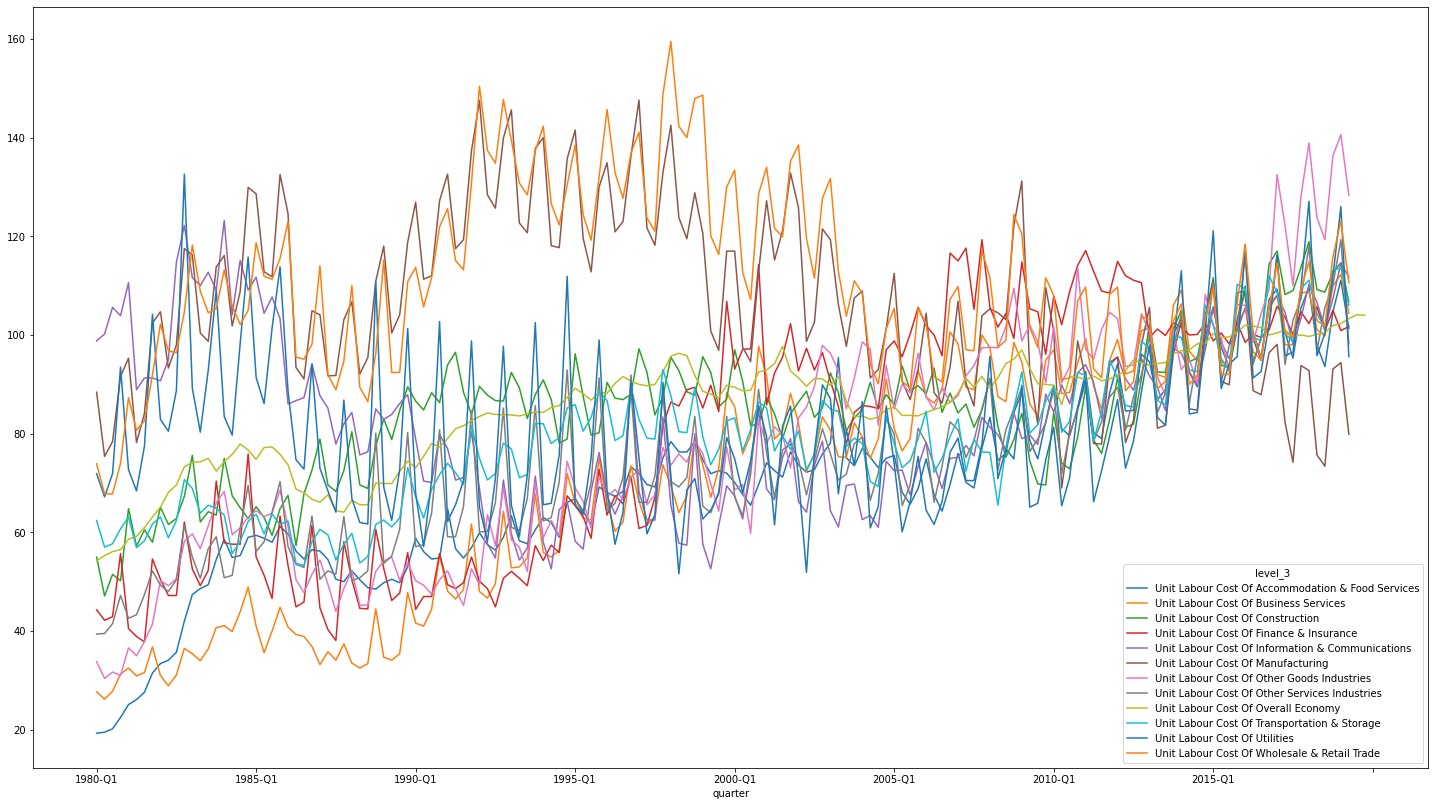

In [6]:
combined_lc.pivot(index="quarter", columns=sector, values="value").plot(figsize=(25,14))

In [7]:
## Cleaning Fertility Rates

In [8]:
df = pd.read_csv("C:/Users/dksat/Documents/GitHub/osiris/births-and-fertility-annual-1960-2018/total-fertility-rate-and-reproduction-rate.csv")
df.head(10)
## validation data set

,year,level_1,value
0,1960,Total Fertility Rate,5.76
1,1960,Gross Reproduction Rate,2.78
2,1960,Net Reproduction Rate,2.54
3,1961,Total Fertility Rate,5.41
4,1961,Gross Reproduction Rate,2.63
5,1961,Net Reproduction Rate,2.41
6,1962,Total Fertility Rate,5.21
7,1962,Gross Reproduction Rate,2.53
8,1962,Net Reproduction Rate,2.31
9,1963,Total Fertility Rate,5.16


In [9]:
ts = pd.read_csv('C:/Users/dksat/Documents/GitHub/osiris/birth-death/live-birth.csv', thousands=",").T
ts.head(10)
#ts = ts.rename(columns=ts.iloc[0]).drop(ts.index[0])
ts.iloc[0][0] = "Total Live-Births"
#pd.PeriodIndex(ts["Data Series"].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2'), freq='Q').to_timestamp()
#df.index.names = ['quarter']
#ts.reset_index(level=0, inplace=True)
ts = ts.rename(columns=ts.iloc[0]).drop(ts.index[0])
ts.index.names = ['quarter']
ts.reset_index(level=0, inplace=True)
ts["quarter"] =ts["quarter"].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2')

C:\Users\dksat\AppData\Local\Temp/ipykernel_8844/1937455122.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  ts["quarter"] =ts["quarter"].str.replace(r'(\d+) (\d)(Q)', r'\1-\3\2')


In [10]:
test =pd.merge(ts, df_lc, on='quarter', how='inner')
test['time'] = pd.PeriodIndex(test['quarter'], freq='Q').to_timestamp() # convert quarterly data into time
test = test.dropna()
raw = test.reset_index(drop=True)
#raw = raw.reindex(index=raw.index[::-1])
raw

,quarter,Total Live-Births,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Business Services,...,Unit Labour Cost Of Finance & Insurance,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Manufacturing,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Other Services Industries,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Utilities,Unit Labour Cost Of Wholesale & Retail Trade,time
0,2019-Q2,9487,4384,3387,1175,336,124,81,101.3,104.4,...,101.7,111.7,79.9,128.3,98.2,103.3,106.0,95.6,110.6,2019-04-01
1,2019-Q1,9402,4456,3316,1128,316,105,81,111.1,112.3,...,100.9,114.6,94.4,140.6,119.3,102.3,113.6,126.0,123.1,2019-01-01
2,2018-Q4,10173,4711,3670,1232,372,109,79,104.7,109.9,...,105.0,107.3,93.1,136.3,110.1,101.9,113.1,111.8,115.8,2018-10-01
3,2018-Q3,9841,4574,3532,1224,337,116,58,93.6,99.8,...,100.9,101.5,73.4,119.3,105.6,100.5,101.2,100.3,101.8,2018-07-01
4,2018-Q2,9427,4387,3338,1168,374,94,66,97.9,101.1,...,105.7,106.6,75.7,123.8,96.7,100.1,104.4,95.8,102.9,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,1987-Q1,8834,4007,3053,1234,320,81,56,56.2,33.2,...,44.7,87.7,104.1,54.4,50.5,66.1,60.6,73.0,114.0,1987-01-01
130,1986-Q4,10239,4782,3423,1454,351,98,51,56.5,36.9,...,61.4,94.1,104.9,51.5,63.3,66.7,58.1,94.1,98.1,1986-10-01
131,1986-Q3,9854,4398,3475,1395,359,98,44,54.6,38.9,...,45.9,87.3,91.1,47.8,52.9,68.0,53.3,72.8,95.1,1986-07-01
132,1986-Q2,9353,4186,3367,1271,332,87,50,56.2,39.3,...,44.9,86.7,93.4,50.4,53.5,68.8,53.7,74.7,95.5,1986-04-01


In [11]:
#raw.sort_values(by="time")
#raw.to_csv("./birth_labour", sep='\t', encoding='utf-8')
raw = raw[::-1].reset_index(drop = True)
raw

,quarter,Total Live-Births,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Business Services,...,Unit Labour Cost Of Finance & Insurance,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Manufacturing,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Other Services Industries,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Utilities,Unit Labour Cost Of Wholesale & Retail Trade,time
0,1986-Q1,9954,4414,3553,1433,316,103,61,59.7,40.8,...,53.3,86.0,124.6,61.2,57.1,73.7,62.3,88.6,123.0,1986-01-01
1,1986-Q2,9353,4186,3367,1271,332,87,50,56.2,39.3,...,44.9,86.7,93.4,50.4,53.5,68.8,53.7,74.7,95.5,1986-04-01
2,1986-Q3,9854,4398,3475,1395,359,98,44,54.6,38.9,...,45.9,87.3,91.1,47.8,52.9,68.0,53.3,72.8,95.1,1986-07-01
3,1986-Q4,10239,4782,3423,1454,351,98,51,56.5,36.9,...,61.4,94.1,104.9,51.5,63.3,66.7,58.1,94.1,98.1,1986-10-01
4,1987-Q1,8834,4007,3053,1234,320,81,56,56.2,33.2,...,44.7,87.7,104.1,54.4,50.5,66.1,60.6,73.0,114.0,1987-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,2018-Q2,9427,4387,3338,1168,374,94,66,97.9,101.1,...,105.7,106.6,75.7,123.8,96.7,100.1,104.4,95.8,102.9,2018-04-01
130,2018-Q3,9841,4574,3532,1224,337,116,58,93.6,99.8,...,100.9,101.5,73.4,119.3,105.6,100.5,101.2,100.3,101.8,2018-07-01
131,2018-Q4,10173,4711,3670,1232,372,109,79,104.7,109.9,...,105.0,107.3,93.1,136.3,110.1,101.9,113.1,111.8,115.8,2018-10-01
132,2019-Q1,9402,4456,3316,1128,316,105,81,111.1,112.3,...,100.9,114.6,94.4,140.6,119.3,102.3,113.6,126.0,123.1,2019-01-01


In [12]:
#raw = pd.read_csv("./birth_labour", sep='\t', encoding='utf-8')
#raw['time'] = pd.PeriodIndex(raw['quarter'], freq='Q').to_timestamp()
#ts.tail(10)

In [13]:
raw.head()

,quarter,Total Live-Births,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Business Services,...,Unit Labour Cost Of Finance & Insurance,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Manufacturing,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Other Services Industries,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Utilities,Unit Labour Cost Of Wholesale & Retail Trade,time
0,1986-Q1,9954,4414,3553,1433,316,103,61,59.7,40.8,...,53.3,86.0,124.6,61.2,57.1,73.7,62.3,88.6,123.0,1986-01-01
1,1986-Q2,9353,4186,3367,1271,332,87,50,56.2,39.3,...,44.9,86.7,93.4,50.4,53.5,68.8,53.7,74.7,95.5,1986-04-01
2,1986-Q3,9854,4398,3475,1395,359,98,44,54.6,38.9,...,45.9,87.3,91.1,47.8,52.9,68.0,53.3,72.8,95.1,1986-07-01
3,1986-Q4,10239,4782,3423,1454,351,98,51,56.5,36.9,...,61.4,94.1,104.9,51.5,63.3,66.7,58.1,94.1,98.1,1986-10-01
4,1987-Q1,8834,4007,3053,1234,320,81,56,56.2,33.2,...,44.7,87.7,104.1,54.4,50.5,66.1,60.6,73.0,114.0,1987-01-01


## Bollinger Bands
Standard deviation over past 4 years(16 time steps)

In [14]:
raw.groupby([pd.Grouper(key="time", freq="Y")])["Total Live-Births"].sum()
raw["total"] = raw["Total Live-Births"]
raw["sd"] = raw["total"].rolling(16).std(ddof=0)
raw["mean"] = raw["total"].rolling(16).mean()
raw['bolu'] = raw['mean'] + 2*raw['sd']
raw['bold'] = raw['mean'] - 2*raw['sd']
raw.tail(5)

,quarter,Total Live-Births,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Business Services,...,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Utilities,Unit Labour Cost Of Wholesale & Retail Trade,time,total,sd,mean,bolu,bold
129,2018-Q2,9427,4387,3338,1168,374,94,66,97.9,101.1,...,100.1,104.4,95.8,102.9,2018-04-01,9427,526.134307,10246.0625,11298.331113,9193.793887
130,2018-Q3,9841,4574,3532,1224,337,116,58,93.6,99.8,...,100.5,101.2,100.3,101.8,2018-07-01,9841,522.642146,10194.2500,11239.534291,9148.965709
131,2018-Q4,10173,4711,3670,1232,372,109,79,104.7,109.9,...,101.9,113.1,111.8,115.8,2018-10-01,10173,455.017015,10130.6250,11040.659031,9220.590969
132,2019-Q1,9402,4456,3316,1128,316,105,81,111.1,112.3,...,102.3,113.6,126.0,123.1,2019-01-01,9402,487.690540,10082.7500,11058.131079,9107.368921
133,2019-Q2,9487,4384,3387,1175,336,124,81,101.3,104.4,...,103.3,106.0,95.6,110.6,2019-04-01,9487,508.533538,10045.1250,11062.192076,9028.057924


In [15]:
from datetime import datetime
#test.set_index('time') set index as time
target = list(raw)[1]
cols = list(raw)[8:20]
timelist = list(raw['time'])
#timelist = [datetime.strptime(date, '%Y-%m-%d').date() for date in timelist]
print('Training set shape:{}'.format(test.shape))
print('Length of Time Series: {}'.format(len(timelist)))
print('Feature targetted: {}'.format(target))
print('Featured selected: {}'.format(cols))
list(raw)[1]

Training set shape:(134, 21)
Length of Time Series: 134
Feature targetted: Total Live-Births
Featured selected: ['Unit Labour Cost Of Accommodation & Food Services', 'Unit Labour Cost Of Business Services', 'Unit Labour Cost Of Construction', 'Unit Labour Cost Of Finance & Insurance', 'Unit Labour Cost Of Information & Communications', 'Unit Labour Cost Of Manufacturing', 'Unit Labour Cost Of Other Goods Industries', 'Unit Labour Cost Of Other Services Industries', 'Unit Labour Cost Of Overall Economy', 'Unit Labour Cost Of Transportation & Storage', 'Unit Labour Cost Of Utilities', 'Unit Labour Cost Of Wholesale & Retail Trade']


'Total Live-Births'

In [16]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
from torch.nn.utils import weight_norm
from sklearn.metrics import mean_squared_error, mean_absolute_error

np.random.seed(131254)

train_length = int(0.8*len(raw))
depth = 4
batch_size = 32
prediction_horizon = 1

train = raw.iloc[:train_length, :]
valid = raw.iloc[train_length:, :]

    #X = np.zeros((len(raw), depth, len(cols)))
    #for i, name in enumerate(cols):
    #    for j in range(depth):
    #        X[:, j, i] = raw[name].shift(depth - j - 1).bfill()
    #y = raw[target].shift(-1).ffill().values
X = np.zeros((len(train), depth, len(cols)))
for i, name in enumerate(cols):
    for j in range(depth):
        X[:, j, i] = train[name].shift(depth - j - 1).bfill()
Y = train[target].shift(-1).ffill().values

x = np.zeros((len(valid), depth, len(cols)))
for i, name in enumerate(cols):
    for j in range(depth):
        x[:, j, i] = valid[name].shift(depth - j - 1).bfill()
y = valid[target].shift(-1).ffill().values

In [17]:
from datetime import datetime
#test.set_index('time') set index as time
target = list(raw)[1]
cols = list(raw)[8:20]
timelist = list(raw['time'])
#timelist = [datetime.strptime(date, '%Y-%m-%d').date() for date in timelist]
print('Training set shape:{}'.format(test.shape))
print('Length of Time Series: {}'.format(len(timelist)))
print('Feature targetted: {}'.format(target))
print('Featured selected: {}'.format(cols))

Training set shape:(134, 21)
Length of Time Series: 134
Feature targetted: Total Live-Births
Featured selected: ['Unit Labour Cost Of Accommodation & Food Services', 'Unit Labour Cost Of Business Services', 'Unit Labour Cost Of Construction', 'Unit Labour Cost Of Finance & Insurance', 'Unit Labour Cost Of Information & Communications', 'Unit Labour Cost Of Manufacturing', 'Unit Labour Cost Of Other Goods Industries', 'Unit Labour Cost Of Other Services Industries', 'Unit Labour Cost Of Overall Economy', 'Unit Labour Cost Of Transportation & Storage', 'Unit Labour Cost Of Utilities', 'Unit Labour Cost Of Wholesale & Retail Trade']


In [18]:
def relative(data):
    return torch.Tensor((data-data.min(axis=0))/(data.max(axis=0)-data.min(axis=0)+ 1e-9)), data.max(axis=0), data.min(axis=0)

X_train, X_train_max , X_train_min = relative(X)
X_test, X_test_max , X_test_min = relative(x)

y_train, y_train_max , y_train_min = relative(Y)
y_test, y_test_max , y_test_min = relative(y)

train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=batch_size, shuffle=False)


In [19]:
import torch
import torch.nn as nn
from torch.nn.utils import weight_norm
torch.manual_seed(8)
class TCNTemporalBlock(nn.Module):
    def __init__(self, input_channels, output_channels, kernel_size, dilation):
        super().__init__()
        padding = int(dilation*(kernel_size-1))
        self.pad = nn.ConstantPad1d((padding, 0), 0)
        self.conv1 = weight_norm(nn.Conv1d(input_channels, output_channels, kernel_size, dilation=dilation))
        self.conv2 = weight_norm(nn.Conv1d(output_channels, output_channels, kernel_size, dilation=dilation))
        self.residual = nn.Conv1d(input_channels, output_channels, 1)
        
    def forward(self, x):
        out = self.pad(x)
        out = torch.relu(self.conv1(out))
        out = self.pad(out)
        out = torch.relu(self.conv2(out))
        y = self.residual(x)
        out = torch.relu(out + y)
        return out
    

class TCN(nn.Module):
    def __init__(self, input_dim, n_layers, n_channels=32, kernel_size=3):
        super().__init__()
        self.first_layer = TCNTemporalBlock(input_dim, n_channels, kernel_size, 1)
        self.tcn_layers = nn.ModuleList([TCNTemporalBlock(n_channels, n_channels, kernel_size, 2**(i+1)) for i in range(n_layers-1)])
        self.n_layers = n_layers
        self.output_transform = nn.Linear(n_channels, 1)
    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.first_layer(x)
        for i in range(self.n_layers-1):
            x = self.tcn_layers[i](x)
        x = x[..., -1]
        out = self.output_transform(x)
        return out.squeeze(1)

mse:  16229860.0 mae:  3769.333


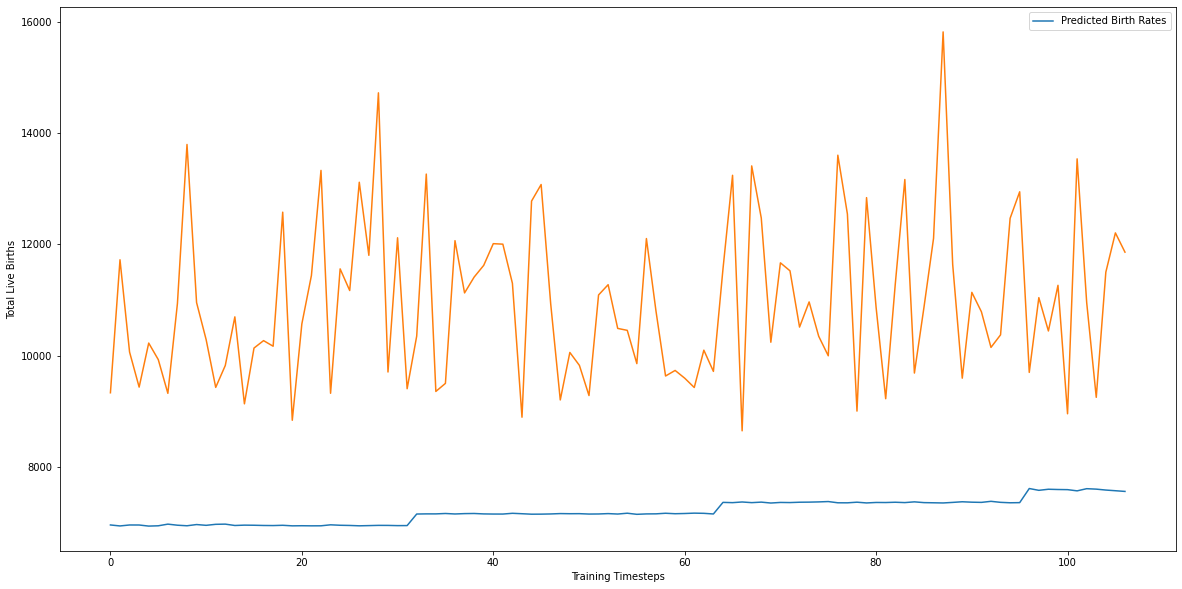

Iter:  0 train_loss:  1.2196341753005981 val_loss:  0.3302566409111023
Iter:  1 train_loss:  0.7481138557195663 val_loss:  0.1903969943523407
Iter:  2 train_loss:  0.3050646372139454 val_loss:  0.09696048498153687
Iter:  3 train_loss:  0.2183709442615509 val_loss:  0.09022534638643265
Iter:  4 train_loss:  0.1827004812657833 val_loss:  0.09375528246164322
Iter:  5 train_loss:  0.16440261527895927 val_loss:  0.09372067451477051
Iter:  6 train_loss:  0.15991446562111378 val_loss:  0.08654022216796875
Iter:  7 train_loss:  0.14272518828511238 val_loss:  0.08114539831876755
Iter:  8 train_loss:  0.17226959392428398 val_loss:  0.07947646081447601
Iter:  9 train_loss:  0.12219952791929245 val_loss:  0.08194363862276077
mse:  1632157.0 mae:  986.3024


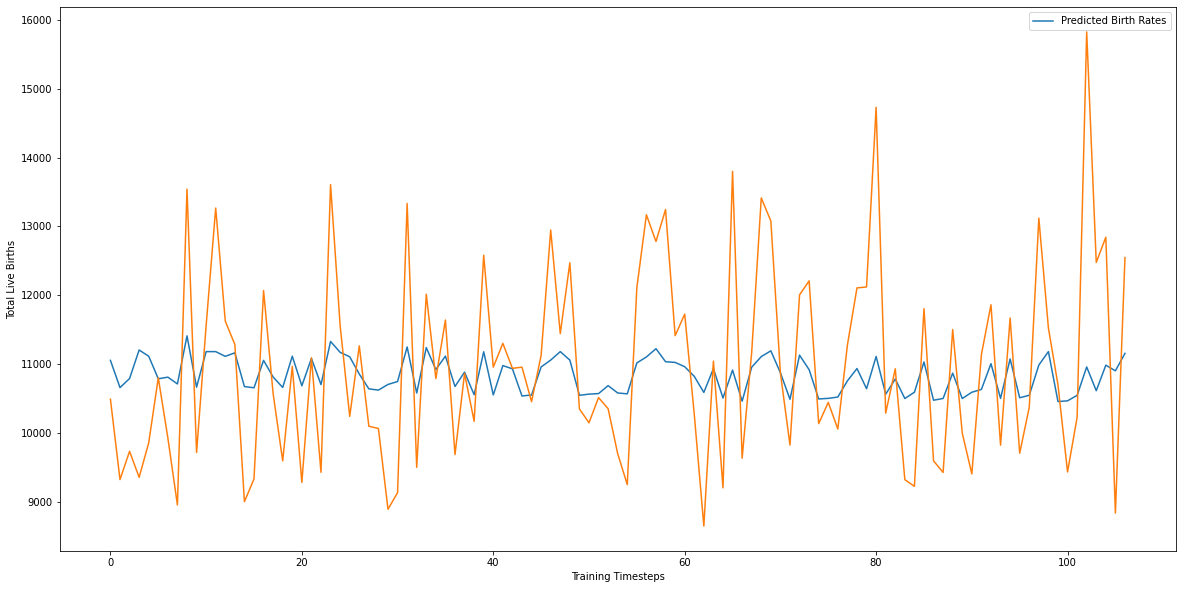

Iter:  10 train_loss:  0.1552638430148363 val_loss:  0.08266281336545944
Iter:  11 train_loss:  0.1141371987760067 val_loss:  0.0725046694278717
Iter:  12 train_loss:  0.08998101949691772 val_loss:  0.07397936284542084
Iter:  13 train_loss:  0.07759167533367872 val_loss:  0.08058518916368484
Iter:  14 train_loss:  0.07338250428438187 val_loss:  0.07059989869594574
Iter:  15 train_loss:  0.07532962784171104 val_loss:  0.07932930439710617
Iter:  16 train_loss:  0.05903002666309476 val_loss:  0.07329332828521729
Iter:  17 train_loss:  0.05266755819320679 val_loss:  0.08355721831321716
Iter:  18 train_loss:  0.05498008243739605 val_loss:  0.06874729692935944
Iter:  19 train_loss:  0.05559908878058195 val_loss:  0.08549948036670685
mse:  684209.6 mae:  584.8201


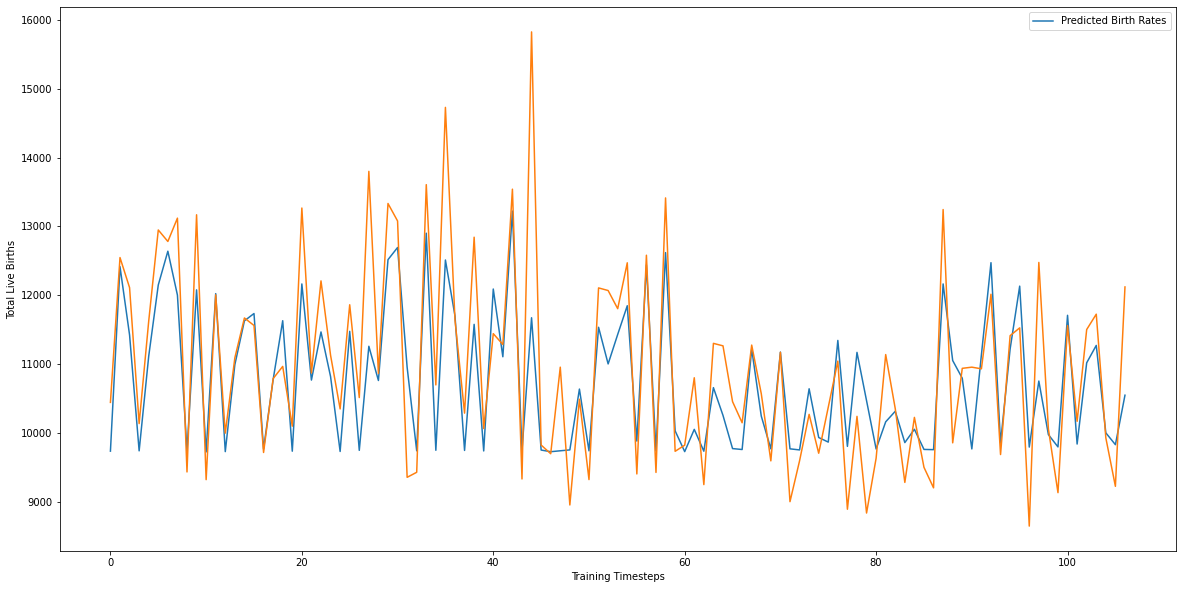

Iter:  20 train_loss:  0.05377517081797123 val_loss:  0.06662606447935104
Iter:  21 train_loss:  0.04432511981576681 val_loss:  0.07666872441768646
Iter:  22 train_loss:  0.04426772054284811 val_loss:  0.07522039115428925
Iter:  23 train_loss:  0.044798712246119976 val_loss:  0.07367880642414093
Iter:  24 train_loss:  0.03689909470267594 val_loss:  0.080694280564785
Iter:  25 train_loss:  0.034760217647999525 val_loss:  0.06828571856021881
Iter:  26 train_loss:  0.03715038578957319 val_loss:  0.07871120423078537
Iter:  27 train_loss:  0.03142103413119912 val_loss:  0.07390787452459335
Iter:  28 train_loss:  0.03406797535717487 val_loss:  0.0789564996957779
Iter:  29 train_loss:  0.03068349091336131 val_loss:  0.07558292150497437


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
model = TCN(X_train.shape[2], 5).cuda()
opt = torch.optim.Adam(model.parameters(), lr=0.002)
sc = torch.optim.lr_scheduler.StepLR(opt, 10, 0.9)
loss = nn.MSELoss()
early_stopping_rounds=10
vl = 99999
counter = 0
for e in range(300):
    train_loss = 0
    val_loss = 0
    preds = []
    true = []
    for batch_x, batch_y in train_loader:
        batch_x = batch_x.cuda()
        batch_y = batch_y.cuda()
        
        opt.zero_grad()
        
        output = model(batch_x)
        true.append(batch_y.detach().cpu().numpy())
        preds.append(output.detach().cpu().numpy())
        
        l = loss(output, batch_y)
        
        l.backward()
        
        opt.step()
        
        train_loss += l.item()
    true = np.concatenate(true)
    preds = np.concatenate(preds)
    
    sc.step()
    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            batch_x = batch_x.cuda()
            batch_y = batch_y.cuda()
            
            output = model(batch_x)
            l = loss(output, batch_y)
            val_loss += l.item()

            
    if vl > val_loss:
        vl = val_loss
        torch.save(model.state_dict(), 'birth_labour.pt')
        counter = 0
    
    else:
        counter += 1
        
    if counter >= early_stopping_rounds:
        break
    
    if (e%10 == 0):
        preds = preds*(y_train_max - y_train_min) + y_train_min
        true = true*(y_train_max - y_train_min) + y_train_min
        mse = mean_squared_error(true, preds)
        mae = mean_absolute_error(true, preds)
        print("mse: ", mse, "mae: ", mae)
        plt.figure(figsize=(20, 10))
        plt.plot(preds, label='Predicted Birth Rates')
        plt.plot(true)
        plt.xlabel("Training Timesteps")
        plt.ylabel("Total Live Births")
        plt.legend(loc="upper right")
        plt.show()
        
    print('Iter: ', e, 'train_loss: ', train_loss, 'val_loss: ', val_loss)



In [21]:
preds = []
true = []
with torch.no_grad():
    for batch_x, batch_y in test_loader:
        batch_x = batch_x.cuda()
        batch_y = batch_y.cuda()

        output = model(batch_x)
        
        true.append(batch_y.detach().cpu().numpy())
        preds.append(output.detach().cpu().numpy())

true = np.concatenate(true)
preds = np.concatenate(preds)

0.073303156 0.2142626


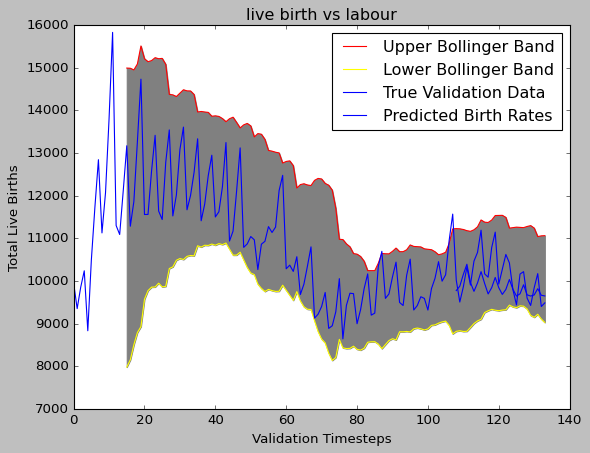

<Figure size 12000x12000 with 0 Axes>

In [22]:
preds_rel = preds
true_rel = true
raw.loc[len(raw)-len(preds)+1:len(raw), 'pred'] = (preds*(y_test_max-y_test_min+ 1e-9) + y_test_min)[:-1]
raw.loc[len(raw)-len(preds)+1:len(raw), 'test'] = (true*(y_test_max-y_test_min+ 1e-9) + y_test_min)[:-1]
plt.style.use('classic')
plt.plot(raw['bolu'],color="red", label='Upper Bollinger Band')
plt.plot(raw['bold'],color="yellow", label='Lower Bollinger Band')
plt.plot(raw['total'], label='True Validation Data')
plt.plot(raw['pred'],color="blue", label='Predicted Birth Rates')
plt.title("live birth vs labour")
plt.xlabel("Validation Timesteps")
plt.ylabel("Total Live Births")
plt.legend(loc="upper right")
plt.fill_between(raw.index,raw['bolu'],raw['bold'], color='gray')
plt.figure(figsize=(10, 10), dpi=1200)
fig1 = plt.gcf()
fig1.savefig('C:/Users/dksat/Documents/GitHub/osiris/plot_outputs/birthvs' + sector +'.png')

mse = mean_squared_error(true, preds)
mae = mean_absolute_error(true, preds)
#classification_report(true,preds)
print(mse, mae)
# convert to binary classification
# statistical significance => problem space
# lagging data=> m

In [23]:
#!pip install pmdarima
from pmdarima import auto_arima
pq = []
data = train[[target]+cols].values.tolist()
print(data)

[[9954, 59.7, 40.8, 67.5, 53.3, 86.0, 124.6, 61.2, 57.1, 73.7, 62.3, 88.6, 123.0], [9353, 56.2, 39.3, 57.3, 44.9, 86.7, 93.4, 50.4, 53.5, 68.8, 53.7, 74.7, 95.5], [9854, 54.6, 38.9, 67.8, 45.9, 87.3, 91.1, 47.8, 52.9, 68.0, 53.3, 72.8, 95.1], [10239, 56.5, 36.9, 72.6, 61.4, 94.1, 104.9, 51.5, 63.3, 66.7, 58.1, 94.1, 98.1], [8834, 56.2, 33.2, 78.9, 44.7, 87.7, 104.1, 54.4, 50.5, 66.1, 60.6, 73.0, 114.0], [10488, 54.5, 35.8, 69.6, 40.3, 85.2, 91.7, 49.5, 52.2, 67.6, 59.5, 68.4, 91.9], [11724, 50.5, 34.1, 68.3, 38.1, 77.9, 91.8, 44.0, 51.5, 64.4, 54.4, 64.1, 88.9], [12843, 50.0, 37.4, 72.5, 58.1, 82.0, 103.1, 48.6, 63.2, 64.1, 57.6, 86.8, 94.7], [11127, 52.2, 33.5, 80.4, 50.4, 84.3, 106.7, 52.3, 50.2, 66.5, 59.8, 66.9, 110.0], [12068, 50.4, 32.5, 69.6, 44.6, 75.7, 92.1, 45.2, 50.8, 65.6, 53.8, 62.0, 89.4], [13800, 48.8, 33.4, 68.9, 44.5, 76.3, 95.4, 45.3, 52.2, 65.6, 55.1, 61.7, 86.5], [15827, 48.5, 44.5, 77.5, 60.6, 85.0, 110.9, 52.1, 80.1, 70.0, 61.6, 110.9, 96.2], [11300, 49.8, 34.7, 8

In [50]:
trainee = train.drop('quarter',1)
trainee = trainee.drop('time',1)
trainee = trainee.drop('sd',1)
trainee = trainee.drop('mean',1)
trainee = trainee.drop('bolu',1)
trainee = trainee.drop('bold',1)



trainee

C:\Users\dksat\AppData\Local\Temp/ipykernel_8844/3569719442.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  trainee = train.drop('quarter',1)
C:\Users\dksat\AppData\Local\Temp/ipykernel_8844/3569719442.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  trainee = trainee.drop('time',1)
C:\Users\dksat\AppData\Local\Temp/ipykernel_8844/3569719442.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  trainee = trainee.drop('sd',1)
C:\Users\dksat\AppData\Local\Temp/ipykernel_8844/3569719442.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  trainee = trainee.drop('mean',1)
C:\Users\dksat\AppData\Local\Temp/ipykernel_8844/3569719442.py:5: FutureW

,Total Live-Births,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Business Services,Unit Labour Cost Of Construction,Unit Labour Cost Of Finance & Insurance,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Manufacturing,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Other Services Industries,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Utilities,Unit Labour Cost Of Wholesale & Retail Trade,total
0,9954,4414,3553,1433,316,103,61,59.7,40.8,67.5,53.3,86.0,124.6,61.2,57.1,73.7,62.3,88.6,123.0,9954
1,9353,4186,3367,1271,332,87,50,56.2,39.3,57.3,44.9,86.7,93.4,50.4,53.5,68.8,53.7,74.7,95.5,9353
2,9854,4398,3475,1395,359,98,44,54.6,38.9,67.8,45.9,87.3,91.1,47.8,52.9,68.0,53.3,72.8,95.1,9854
3,10239,4782,3423,1454,351,98,51,56.5,36.9,72.6,61.4,94.1,104.9,51.5,63.3,66.7,58.1,94.1,98.1,10239
4,8834,4007,3053,1234,320,81,56,56.2,33.2,78.9,44.7,87.7,104.1,54.4,50.5,66.1,60.6,73.0,114.0,8834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,10062,4804,3645,1204,307,72,30,79.0,84.9,76.0,108.9,83.1,77.9,101.1,82.4,90.7,84.5,72.5,91.3,10062
103,10453,5068,3703,1192,346,90,54,88.2,94.8,82.8,108.5,93.8,94.4,104.6,87.4,91.1,94.9,79.4,108.2,10453
104,9995,4828,3540,1193,309,86,39,94.1,99.1,91.4,114.9,95.6,95.5,103.3,89.4,91.8,91.3,86.9,109.7,9995
105,10146,4838,3633,1225,307,88,55,84.6,92.1,81.3,112.0,91.1,78.2,93.6,80.7,92.8,85.7,73.0,88.7,10146


In [51]:
for name, column in trainee.iteritems():
    print(f'Searching order of p and q for : {name}')
    stepwise_model = auto_arima(trainee[name],start_p=1, start_q=1,max_p=7, max_q=7, seasonal=False,
        trace=True,error_action='ignore',suppress_warnings=True, stepwise=True,maxiter=1000)
    parameter = stepwise_model.get_params().get('order')
    print(f'optimal order for:{name} is: {parameter} \n\n')
    pq.append(stepwise_model.get_params().get('order'))

Searching order of p and q for : Total Live-Births
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1767.045, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1784.857, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1782.765, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1768.493, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1782.870, Time=0.00 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1751.434, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1760.511, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1714.675, Time=0.15 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1729.710, Time=0.03 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1712.808, Time=0.08 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1710.268, Time=0.06 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=1712.164, Time=0.16 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=1713.841, Time=0.28 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=1708.3

In [54]:
print(pq)

[(4, 1, 0), (4, 1, 4), (7, 1, 4), (3, 1, 3), (0, 1, 1), (0, 1, 1), (1, 0, 1), (4, 1, 0), (4, 1, 0), (4, 0, 3), (1, 1, 3), (2, 1, 5), (2, 1, 0), (1, 1, 3), (0, 1, 5), (1, 1, 1), (4, 1, 0), (5, 0, 1), (7, 1, 1), (4, 1, 0), (4, 1, 0), (4, 1, 4), (7, 1, 4), (3, 1, 3), (0, 1, 1), (0, 1, 1), (1, 0, 1), (4, 1, 0), (4, 1, 0), (4, 0, 3), (1, 1, 3), (2, 1, 5), (2, 1, 0), (1, 1, 3), (0, 1, 5), (1, 1, 1), (4, 1, 0), (5, 0, 1), (7, 1, 1), (4, 1, 0)]


In [55]:
# VARMA example
## endogenous
from statsmodels.tsa.statespace.varmax import VARMAX
# dataset with variates
data = train[[target]+cols].values.tolist()
# fit model
model = VARMAX(data, order=(4, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.forecast(steps=27)
yhat
## RUN JUST ENDOGENOUS EXOGENOUS is a dumpsterfire

C:\Python39\lib\site-packages\statsmodels\tsa\statespace\varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


array([[10216.43008403,    89.80227733,    97.73689479,    85.17100883,
          112.6307332 ,    98.0509247 ,   107.02716927,   101.63035637,
           89.89165663,    95.45081422,    95.25250128,    81.42825529,
          110.28691291],
       [ 9281.95030366,    93.44869648,   100.41410916,    92.12955409,
          116.4669484 ,   100.23790867,   105.23062613,    95.83992238,
           88.38016227,    96.03853335,    95.57799165,    80.4301542 ,
          117.38104762],
       [ 9457.3738392 ,    85.70033399,    91.54830634,    84.49269536,
          109.03275375,    91.94390104,    88.37706948,    93.01843264,
           80.07863429,    96.05195273,    84.38868394,    66.37730226,
          101.63906604],
       [10677.53968714,    83.64079546,    89.71152247,    81.15172206,
          112.3636466 ,    88.28310595,    90.0311134 ,    94.66348492,
           85.80559841,    96.77481223,    86.1063004 ,    74.10700693,
          101.86340042],
       [10304.09777372,    91.793985

<Figure size 12000x12000 with 0 Axes>

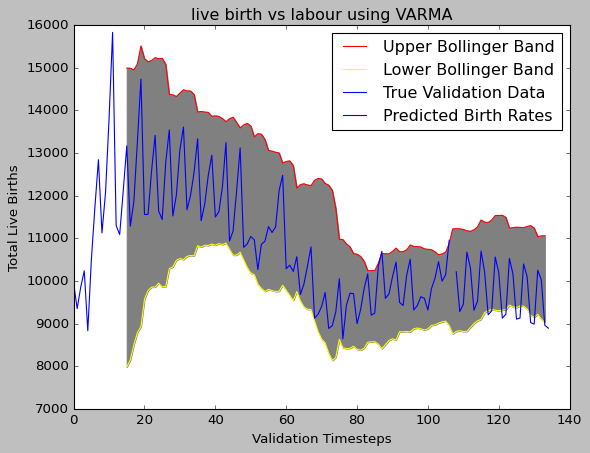

<Figure size 12000x12000 with 0 Axes>

In [57]:
varma = pd.DataFrame(yhat)
plt.plot(raw['bolu'],color="red", label='Upper Bollinger Band')
plt.plot(raw['bold'],color="yellow", label='Lower Bollinger Band')
plt.plot(train['total'], label='True Validation Data')
plt.plot(range(108,135),varma[0],color="blue", label='Predicted Birth Rates')
plt.title("live birth vs labour using VARMA")
plt.xlabel("Validation Timesteps")
plt.ylabel("Total Live Births")
plt.legend(loc="upper right")
plt.fill_between(raw.index,raw['bolu'],raw['bold'], color='gray')
plt.figure(figsize=(10, 10), dpi=1200)


In [27]:
import numpy as np
from scipy.stats import norm

#The inputs are two error lists (or array). The outputs are the confidence that these two models have obvious performance discrepancy
#The lengths of the inputs should match. In addition, the length should be more than 1
def DM_test(a,b):
    a=np.array(a)
    b=np.array(b)
    a=a.astype(np.float64)
    b=b.astype(np.float64)
    if len(a.shape)!=1 or len(b.shape)!=1:
        raise Exception('The inputs must be two 1D lists or arraries')
    elif a.shape[0]!=b.shape[0]:
        raise Exception('The lengths of the two inputs do not match')
    elif a.shape[0]==1:
        raise Exception('The length of the input should be more than 1')

    d=a-b
    d_mean=np.abs(np.mean(d))
    d_std=np.std(d-d_mean)
    if d_std==0:
        DM=1e10
    else:
        DM=d_mean/d_std
    confidence=norm(0,1).cdf(abs(DM))
    return confidence

DM_test(true_rel, preds_rel)

0.7175193348228489